In [1]:
import sys
from os.path import join, abspath
from glob import glob
import numpy as np
import vaex
from tqdm import tqdm
import matplotlib.pyplot as plt
from time import time
from scipy.optimize import curve_fit
from scipy.stats import norm, skewnorm

In [2]:
# import utils
root_dir = abspath(join('..'))
root_dir

'/home2/s20321005/Thesis-Project'

In [3]:
if root_dir not in sys.path:
    sys.path.append(root_dir)
sys.path

['/home2/s20321005/Thesis-Project/6_Analisis',
 '/home2/s20321005/.conda/envs/vaex/lib/python38.zip',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/lib-dynload',
 '',
 '/home2/s20321005/.local/lib/python3.8/site-packages',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages',
 '/home2/s20321005/Thesis-Project']

In [4]:
from utils import style, hdi, load_spectral_types

In [5]:
sp = load_spectral_types()
sp

,SpT,M_J,J-H,H-Ks,J-K
0,O9V,-3.44,-0.164,-0.071,-0.235
1,O9.5V,-3.30,-0.161,-0.069,-0.230
2,B0V,-3.17,-0.159,-0.067,-0.226
3,B0.5V,-2.80,-0.153,-0.063,-0.216
4,B1V,-2.33,-0.148,-0.059,-0.207
...,...,...,...,...,...
95,T6V,15.34,0.100,-0.030,0.070
96,T7V,15.83,0.000,0.000,0.000
97,T7.5V,16.61,0.200,-0.050,0.150
98,T8V,17.30,0.200,-0.050,0.150


In [6]:
style(name="seaborn-notebook")

In [7]:
root_data_dir = abspath(join(root_dir, "Data"))
root_data_dir

'/home2/s20321005/Thesis-Project/Data'

In [8]:
data_baryon_dir = join(root_data_dir, "Baryon")
# load baryons components
df_baryon = vaex.open(join(data_baryon_dir, "baryon.hdf5"))
rhos = df_baryon["rho"].to_numpy()  # Msun/pc^3
sigmaz = df_baryon["sigma_z"].to_numpy() # km/s

e_rhos = df_baryon["e_rho"].to_numpy()  # Msun/pc^3
e_sigmaz = df_baryon["e_sigma_z"].to_numpy() # km/s
dpi=100

In [9]:
eff_vol = glob(join(root_data_dir, 'Effective-Volume', 'no', "z*"))
eff_vol.sort()
eff_vol

['/home2/s20321005/Thesis-Project/Data/Effective-Volume/no/z_(-0.00)_(0.11).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume/no/z_(0.11)_(0.16).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume/no/z_(0.16)_(0.19).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume/no/z_(0.19)_(0.22).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume/no/z_(0.22)_(0.24).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume/no/z_(0.24)_(0.27).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume/no/z_(0.27)_(0.29).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume/no/z_(0.29)_(0.31).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume/no/z_(0.31)_(0.32).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume/no/z_(0.32)_(0.34).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume/no/z_(0.34)_(0.36).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume/no/z_(0.36)_(0.37).hdf5']

In [10]:
import re
c1, c2 = [], []
# get the value between () of the file name
for f in eff_vol:
    c1.append(float(re.findall(r'\((.*?)\)', f)[0]))
    c2.append(float(re.findall(r'\((.*?)\)', f)[1]))
c1 = np.array(c1)
c2 = np.array(c2)
c = 0.5*(c1+c2)
c

array([0.055, 0.135, 0.175, 0.205, 0.23 , 0.255, 0.28 , 0.3  , 0.315,
       0.33 , 0.35 , 0.365])

In [11]:
mcmc_dm_dir = join(root_data_dir, "MCMC-no", "no", "data")
mcmc_dm_dir

'/home2/s20321005/Thesis-Project/Data/MCMC-no/no/data'

In [12]:
files = glob(join(mcmc_dm_dir, "chain-*"))
files.sort()
files

['/home2/s20321005/Thesis-Project/Data/MCMC-no/no/data/chain-(-0.00)_(0.11).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/no/data/chain-(0.11)_(0.16).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/no/data/chain-(0.16)_(0.19).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/no/data/chain-(0.19)_(0.22).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/no/data/chain-(0.22)_(0.24).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/no/data/chain-(0.24)_(0.27).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/no/data/chain-(0.27)_(0.29).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/no/data/chain-(0.29)_(0.31).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/no/data/chain-(0.31)_(0.32).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/no/data/chain-(0.32)_(0.34).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/no/data/chain-(0.34)_(0.36).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/no/data/chain-(0.36)_(0.37).npy']

# Fungsi interpolasi

In [14]:
from utils import inv_simple, inv_standard, simple, standard

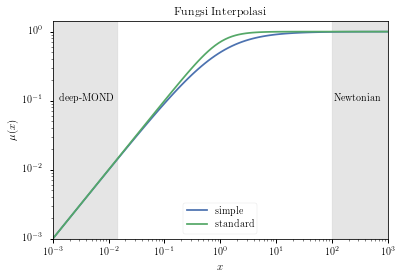

In [15]:
x = np.logspace(-3, 3, 100)
y_simple = simple(x)
y_standard = standard(x)

plt.plot(x, y_simple, label="simple")
plt.plot(x, y_standard, label="standard")
plt.axvspan(0.001, 0.015, alpha=0.2, color="gray")
plt.axvspan(100, 1000, alpha=0.2, color="gray")
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$x$")
plt.ylabel(r"$\mu(x)$")
plt.title("Fungsi Interpolasi")
plt.xlim(x.min(), x.max())
plt.ylim(y_simple.min())
plt.text(0.0013, 0.1, r"deep-MOND", fontsize=10)
plt.text(110, 0.1, r"Newtonian", fontsize=10)
plt.legend()
# plt.savefig(join("img", "fungsi-interpolasi.pdf"), dpi=70)
plt.show()


## tes

In [13]:
index = 0
df = np.load(files[index])
df.shape

(500, 330, 33)

In [14]:
rhob = df[:, :, 12:24]
rhob = rhob.reshape(-1, 12)
rhob = rhob.sum(axis=1)/1E-2
length = rhob.shape[0]
rhob0 = np.empty((length, 12))
for i in range(12):
    rhob0[:,i] = norm.rvs(loc=rhos[i], scale=e_rhos[i], size=length)
rhob0 = rhob0.sum(axis=1)/1E-2
rhoD = rhob - rhob0
# rhoD = rhob*(1/mu0-1)

# plot

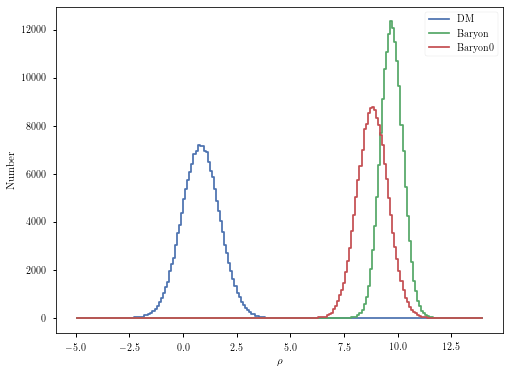

In [15]:
rho = np.linspace(-5, 14, 200)
rhoD_num, _ = np.histogram(rhoD, bins=rho)
rhob_num, _ = np.histogram(rhob, bins=rho)
rhob0_num, _ = np.histogram(rhob0, bins=rho)
rhomid = 0.5*(rho[1:] + rho[:-1])
# plot step
fig, ax = plt.subplots(figsize=(8, 6))
ax.step(rhomid, rhoD_num, label='DM')
ax.step(rhomid, rhob_num, label='Baryon')
ax.step(rhomid, rhob0_num, label='Baryon0')
ax.set_xlabel(r'$\rho$')
ax.set_ylabel('Number')
ax.legend()
plt.show()

In [16]:
rhoD_sample = np.random.choice(rhoD, size=10_000, replace=False)
rhoD_fit = skewnorm.fit(rhoD_sample)
rhob_sample = np.random.choice(rhob, size=10_000, replace=False)
rhob_fit = skewnorm.fit(rhob_sample)
rhob0_sample = np.random.choice(rhob0, size=10_000, replace=False)
rhob0_fit = norm.fit(rhob0_sample)

((0.4366824572048166, 0.5771094882528635, 0.9173992806278524),
 (0.5078876326697643, 9.562952714744442, 0.5532366311460599),
 (8.898528286192748, 0.7095614982154208))

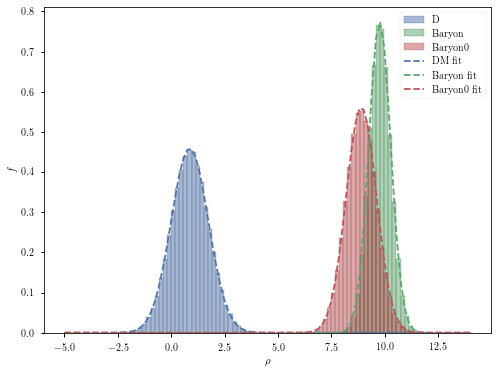

In [17]:
# plot
rho = np.linspace(-5, 14, 100)
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(rhoD, bins=rho, density=True, label='D', ec='k', alpha=0.5, color='C0')
ax.hist(rhob, bins=rho, density=True, label='Baryon', ec='k', alpha=0.5,color='C1')
ax.hist(rhob0, bins=rho, density=True, label='Baryon0', ec='k', alpha=0.5, color='C2')
ax.plot(rho, skewnorm.pdf(rho, *rhoD_fit), label='DM fit', color='C0',  ls='--')
ax.plot(rho, skewnorm.pdf(rho, *rhob_fit), label='Baryon fit', color='C1', ls='--')
ax.plot(rho, norm.pdf(rho, *rhob0_fit), label='Baryon0 fit', color='C2', ls='--')
ax.set_xlabel(r'$\rho$')
ax.set_ylabel(r'$f$')
ax.legend()
rhoD_fit, rhob_fit, rhob0_fit

rhoD = 0.86 +0.87/-0.86
rhob = 9.76 +0.51/-0.51
rhob0 = 8.90 +0.70/-0.71


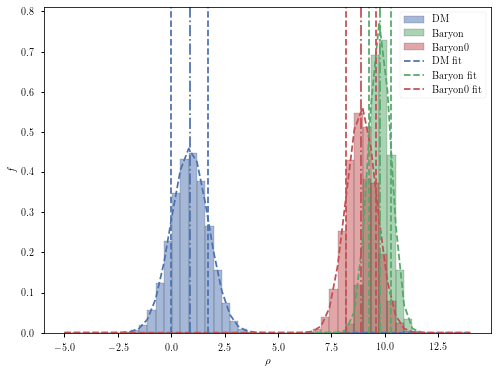

In [18]:
sigma = np.array([68, 90, 95])
alpha = 1 - sigma/100

hpd, modes = hdi(lambda x: skewnorm.pdf(x, *rhoD_fit), -3, 7, alpha=alpha[0])
rhoD_mode = modes[0]
rhoD_low, rhoD_high = hpd[0]

hpd, modes = hdi(lambda x: skewnorm.pdf(x, *rhob_fit), 5, 12.5, alpha=alpha[0])
rhob_mode = modes[0]
rhob_low, rhob_high = hpd[0]

hpd, modes = hdi(lambda x: norm.pdf(x, *rhob0_fit), 5, 12.5, alpha=alpha[0])
rhob0_mode = modes[0]
rhob0_low, rhob0_high = hpd[0]

# plot
rho = np.linspace(-5, 14, 50)
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(rhoD, bins=rho, density=True, label='DM', ec='k', alpha=0.5, color='C0')
ax.hist(rhob, bins=rho, density=True, label='Baryon', ec='k', alpha=0.5,color='C1')
ax.hist(rhob0, bins=rho, density=True, label='Baryon0', ec='k', alpha=0.5, color='C2')
ax.plot(rho, skewnorm.pdf(rho, *rhoD_fit), label='DM fit', color='C0',  ls='--')
ax.plot(rho, skewnorm.pdf(rho, *rhob_fit), label='Baryon fit', color='C1', ls='--')
ax.plot(rho, norm.pdf(rho, *rhob0_fit), label='Baryon0 fit', color='C2', ls='--')
ax.axvline(rhoD_mode, color='C0', ls='-.')
ax.axvline(rhob_mode, color='C1', ls='-.')
ax.axvline(rhob0_mode, color='C2', ls='-.')
ax.axvline(rhoD_low, color='C0', ls='--')
ax.axvline(rhoD_high, color='C0', ls='--')
ax.axvline(rhob_low, color='C1', ls='--')
ax.axvline(rhob_high, color='C1', ls='--')
ax.axvline(rhob0_low, color='C2', ls='--')
ax.axvline(rhob0_high, color='C2', ls='--')
ax.set_xlabel(r'$\rho$')
ax.set_ylabel(r'$f$')
ax.legend()
print(f'rhoD = {rhoD_mode:.02f} +{rhoD_high-rhoD_mode:.02f}/-{rhoD_mode-rhoD_low:.02f}')
print(f'rhob = {rhob_mode:.02f} +{rhob_high-rhob_mode:.02f}/-{rhob_mode-rhob_low:.02f}')
print(f'rhob0 = {rhob0_mode:.02f} +{rhob0_high-rhob0_mode:.02f}/-{rhob0_mode-rhob0_low:.02f}')

rhob0 = 8.90 +0.70/-0.71


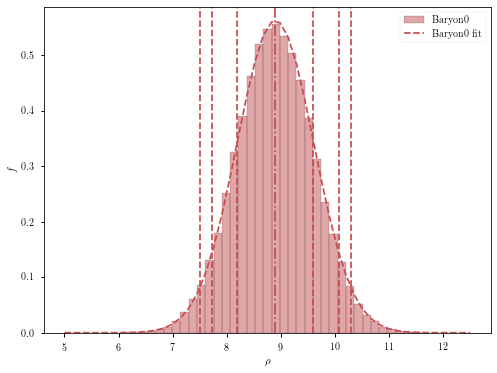

In [19]:
rhob0_low = []
rhob0_high = []
for i, alp in enumerate(alpha):
    hpd, modes = hdi(lambda x: norm.pdf(x, *rhob0_fit), low=5, high=12.5, alpha=alp)
    low, high = hpd[0]
    rhob0_low.append(low)
    rhob0_high.append(high)
# plot
rho = np.linspace(5, 12.5, 50)
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(rhob0, bins=rho, density=True, label='Baryon0', ec='k', alpha=0.5, color='C2')
ax.plot(rho, norm.pdf(rho, *rhob0_fit), label='Baryon0 fit', color='C2', ls='--')
ax.axvline(rhob0_mode, color='C2', ls='-.')
for low, high in zip(rhob0_low, rhob0_high):
    ax.axvline(low, color='C2', ls='--')
    ax.axvline(high, color='C2', ls='--')
ax.set_xlabel(r'$\rho$')
ax.set_ylabel(r'$f$')
ax.legend()
print(f'rhob0 = {rhob0_mode:.02f} +{rhob0_high[0]-rhob0_mode:.02f}/-{rhob0_mode-rhob0_low[0]:.02f}')

In [20]:
from tqdm import tqdm

rhoD_modes = []
rhoD_errs = []
rhob_modes = []
rhob_errs = []
rhoD_fits = []

for file in tqdm(files):
    df = np.load(file)
    rhob = df[:, :, 12:24]
    rhob = rhob.reshape(-1, 12)
    rhob = rhob.sum(axis=1)/1E-2
    rhoD = rhob - rhob0
    # print("fitting...")
    rhoD_sample = np.random.choice(rhoD, size=10_000, replace=False)
    rhoD_fit = skewnorm.fit(rhoD_sample)
    rhoD_fits.append(rhoD_fit)
    rhob_sample = np.random.choice(rhob, size=10_000, replace=False)
    rhob_fit = skewnorm.fit(rhob_sample)
    # print("calculating HDI...")
    rhoD_err = []
    rhob_err = []
    rhoD_mode = None
    rhob_mode = None
    for i, alp in enumerate(alpha):
        hpd, modes = hdi(lambda x: skewnorm.pdf(x, *rhoD_fit), -5, 10, alpha=alp)
        rhoDM_mode = modes[0]
        low, high = hpd[0]
        rhoD_err.append({'alpha': alp, 'low': low, 'high': high})

        hpd, modes = hdi(lambda x: skewnorm.pdf(x, *rhob_fit), 5, 15, alpha=alp)
        rhob_mode = modes[0]
        low, high = hpd[0]
        rhob_err.append({'alpha': alp, 'low': low, 'high': high})
    rhoD_errs.append(rhoD_err)
    rhob_errs.append(rhob_err)
    rhoD_modes.append(rhoDM_mode)
    rhob_modes.append(rhob_mode)

100%|██████████| 12/12 [00:05<00:00,  2.21it/s]


In [21]:
rhoD_fits

[(0.0001776973207946352, 0.8722138272678099, 0.8779695694505999),
 (3.916247342760743e-05, 0.7849818182364616, 0.9260964380061967),
 (0.24812003558406553, -0.059444938518968704, 0.9576038374315627),
 (0.5154996603814161, 0.7858021746667865, 0.9898882048825525),
 (-2.5004398396549305e-05, 1.06316055863818, 0.9556851066171874),
 (0.48211945791559574, 1.1548704014529414, 0.9847350284008218),
 (9.488537670529262e-05, 1.3337799926388039, 0.9276507056532128),
 (0.5479652633039701, 0.34225665023077356, 1.0043231982135556),
 (-0.4216769710282703, 0.4047839814854974, 1.0164748926967646),
 (0.5605708585357803, 0.4074945082214091, 1.0219670000359722),
 (0.305924597555388, 0.13634076929337197, 0.9817759363927058),
 (0.3566993140377857, -0.12699499761854693, 1.0091333636605435)]

(-1.0, 2.0)

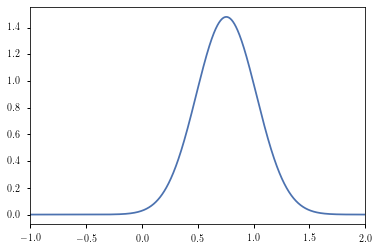

In [22]:
# multiplying the rhoDM, but it became addition in log
rho = np.linspace(-5, 14, 10000)
log_rhoD = None
for p in rhoD_fits:
    if log_rhoD is None:
        log_rhoD = skewnorm.logpdf(rho, *p)
    else:
        log_rhoD += skewnorm.logpdf(rho, *p)
# turn into rhoDM
rhoD_com = np.exp(log_rhoD)
# find area
area = np.trapz(rhoD_com, rho)
# normalize
rhoD_com /= area
# plot
fig, ax = plt.subplots()
ax.plot(rho, rhoD_com, label='rhoD')
ax.set_xlim(-1,2)

In [26]:
def skewpdf(x, *args):
    A, other = args[0], args[1:]
    return A*skewnorm.pdf(x, *other)

rhoD_com_fit, _ = curve_fit(skewpdf, rho, rhoD_com, p0=[1, 1.0, 2.0, 1])
rhoD_com_fit

array([ 9.99992718e-01, -2.16302616e-05,  7.55377955e-01,  2.69499632e-01])

(-1.0, 5.0)

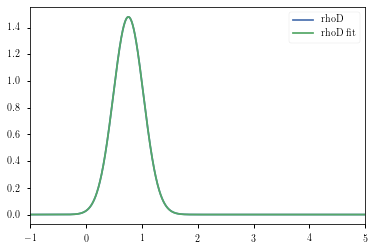

In [27]:
plt.plot(rho, rhoD_com, label='rhoD')
plt.plot(rho, skewpdf(rho, *rhoD_com_fit), label='rhoD fit')
plt.legend()
plt.xlim(-1,5)

In [28]:
rhoD_com_err = []
rhoD_com_mode = None
for i, alp in enumerate(alpha):
    hpd, modes = hdi(lambda x: skewpdf(x, *rhoD_com_fit), low=-1, high=5, alpha=alp)
    low, high = hpd[0]
    rhoD_com_err.append({'sigma':sigma, 'low': low, 'high': high})
    rhoD_com_mode = modes[0]
rhoD_com_mode, rhoD_com_err

(0.76,
 [{'sigma': array([68, 90, 95]), 'low': 0.49, 'high': 1.02},
  {'sigma': array([68, 90, 95]), 'low': 0.31, 'high': 1.2},
  {'sigma': array([68, 90, 95]), 'low': 0.23, 'high': 1.28}])

In [29]:
A9 = sp[sp['SpT'] == 'A9V']['J-K'].values[0]
F0 = sp[sp['SpT'] == 'F0V']['J-K'].values[0]
b1 = (A9+F0)/2

F9 = sp[sp['SpT'] == 'F9V']['J-K'].values[0]
G0 = sp[sp['SpT'] == 'G0V']['J-K'].values[0]
b2 = (F9+G0)/2
b1, b2

(0.1355, 0.314)

In [43]:
# for i in range(len(c)):
#     print(r"${}\leq c < {}$ & {:.02f} & [{:.02f},{:.02f}] & [{:.02f},{:.02f}] & [{:.02f},{:.02f}] \\".format(c1[i], c2[i], rhoDM_mode[i], rhoDM_low68[i], rhoDM_high68[i], rhoDM_low90[i], rhoDM_high90[i], rhoDM_low95[i], rhoDM_high95[i]))

In [44]:
c

array([0.055, 0.135, 0.175, 0.205, 0.23 , 0.255, 0.28 , 0.3  , 0.315,
       0.33 , 0.35 , 0.365])

In [45]:
len(rhoD_modes), len(c)

(12, 12)

In [31]:
c

array([0.055, 0.135, 0.175, 0.205, 0.23 , 0.255, 0.28 , 0.3  , 0.315,
       0.33 , 0.35 , 0.365])

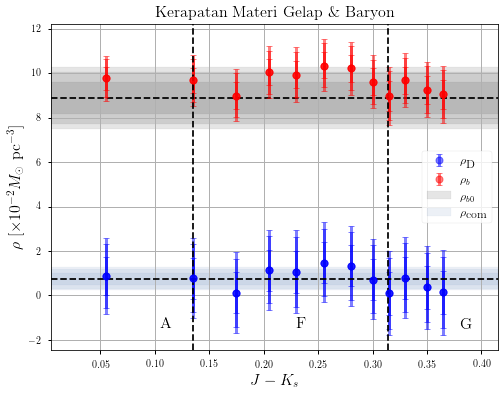

0.76

In [32]:
cs = np.linspace(c.min()-0.05, c.max()+0.05, 100)

fig, ax = plt.subplots(figsize=(8, 6))
ax.axhline(y=rhob0_mode, color='black', linestyle='--')
for i in range(3):
    low = np.array([err[i]['low'] for err in rhoD_errs])
    high = np.array([err[i]['high'] for err in rhoD_errs])
    dm_ax = ax.errorbar(c, rhoD_modes, yerr=[rhoD_modes-low, high-rhoD_modes], fmt='o', color='blue', capsize=3, alpha=0.5, elinewidth=3, markeredgewidth=1)
    low = np.array([err[i]['low'] for err in rhob_errs])
    high = np.array([err[i]['high'] for err in rhob_errs])
    rhob_ax = ax.errorbar(c, rhob_modes, yerr=[rhob_modes-low, high-rhob_modes], fmt='o', color='red', capsize=3, alpha=0.5, elinewidth=3, markeredgewidth=1)
    rhob0_ax = ax.fill_between(cs, rhob0_low[i], rhob0_high[i], color='black', alpha=0.1)
    rhoD_com_ax = ax.fill_between(cs, rhoD_com_err[i]['low'], rhoD_com_err[i]['high'], color='C0', alpha=0.1)
    if i == 2:
        ax.legend([dm_ax, rhob_ax, rhob0_ax, rhoD_com_ax], 
                  [r'$\rho_{\textup{D}}$', r'$\rho_{b}$', r'$\rho_{b0}$', r'$\rho_{\textup{com}}$'],
                  loc='best', fontsize=12)
# real value
ax.axhline(y=rhoD_com_mode, color='black', linestyle='--')

ax.axvline(x=b1, color='black', linestyle='--')
ax.axvline(x=b2, color='black', linestyle='--')
ax.text(0.105, -1.5, r'$\textup{A}$', fontsize=16)
ax.text(0.23, -1.5, r'$\textup{F}$', fontsize=16)
ax.text(0.38, -1.5, r'$\textup{G}$', fontsize=16)
ax.set_xlabel(r'$J-K_s$', fontsize=16)
ax.set_ylabel(r'$\rho$ [$\times 10^{-2}M_{\odot}\ $pc$^{-3}$]', fontsize=16)
ax.set_xlim(cs.min(), cs.max())
ax.set_title("Kerapatan Materi Gelap \& Baryon", fontsize=16)
ax.grid()
# fig.savefig(join('img', 'rhoDM-no.pdf'), dpi=300)
plt.show()
rhoD_com_mode

# $a_0$

interpolation function
**Simple**
\begin{aligned}
    \mu(x) = \frac{x}{1+x}
\end{aligned}

**Standard**
\begin{aligned}
    \mu(x) = \sqrt{\frac{x^2}{1+x^2}}
\end{aligned}

## Inverse

**Simple**
\begin{equation*}
    x = \frac{\mu}{1-\mu}
\end{equation*}

**Standard**
\begin{equation*}
    x = \frac{\mu}{\sqrt{1-\mu^2}}
\end{equation*}

In [33]:
from utils import inv_simple, inv_standard, simple, standard

In [36]:
index = 0
df = np.load(files[index])
df.shape

(500, 330, 33)

In [47]:
rhob = df[:, :, 12:24]
rhob = rhob.reshape(-1, 12)
rhob = rhob.sum(axis=1)/1E-2
length = rhob.shape[0]
rhob0 = np.empty((length, 12))
for i in range(12):
    rhob0[:,i] = norm.rvs(loc=rhos[i], scale=e_rhos[i], size=length)
rhob0 = rhob0.sum(axis=1)/1E-2
rhoD = rhob - rhob0
# rhoD = rhob*(1/mu0-1)

In [48]:
rhoD

array([ 1.65408512, -0.26332417,  0.15133111, ...,  0.57113927,
        0.61782929,  0.05383296])

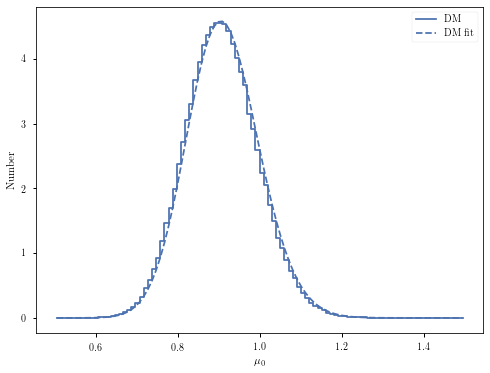

In [53]:
one_over_mu0 = 1 + rhoD/rhob0
mu0 = 1/one_over_mu0
# plot mu0 histogram
mu0s_edge = np.linspace(0.5, 1.5, 100)
mu0s = 0.5*(mu0s_edge[1:] + mu0s_edge[:-1])
mu0_num, _ = np.histogram(mu0, bins=mu0s_edge)
area = mu0_num.sum()*np.diff(mu0s_edge)[0]
mu0_num = mu0_num/area

# fit with skew normal
mu0_sample = np.random.choice(mu0, size=10000, replace=False)
mu0_fit = skewnorm.fit(mu0_sample)

# plot  step
fig, ax = plt.subplots(figsize=(8, 6))
ax.step(mu0s, mu0_num, label='DM')
ax.plot(mu0s, skewnorm.pdf(mu0s, *mu0_fit), label='DM fit', color='C0',  ls='--')
ax.set_xlabel(r'$\mu_0$')
ax.set_ylabel('Number')
ax.legend()
plt.show()

# # simps(skewnorm.pdf(mu0s, *mu0_fit), mu0s)

Transform $\mu_0$ to $x$, where $x=a/a_0$

\begin{align*}
    f_x \text{d}x &= f_\mu \text{d}\mu \\
    f_x &= f_\mu \left(\frac{\text{d}x}{\text{d}\mu}\right)^{-1}
\end{align*}

**simple**

\begin{align*}
    \mu &= \frac{x}{1+x} \\
    x &= \frac{\mu}{1-\mu} \\
    \frac{\text{d}x}{\text{d}\mu} &= \frac{1}{(1-\mu)^2} \\
    \Rightarrow f_x &= f_\mu (1-\mu)^2
\end{align*}

**standard**

\begin{align*}
    \mu &= \frac{x}{\sqrt{1+x^2}} \\
    x &= \frac{\mu}{\sqrt{1-\mu^2}} \\
    \frac{\text{d}x}{\text{d}\mu} &= \frac{1}{(1-\mu^2)^{3/2}} \\
    \Rightarrow f_x &= f_\mu (1-\mu^2)^{3/2}
\end{align*}

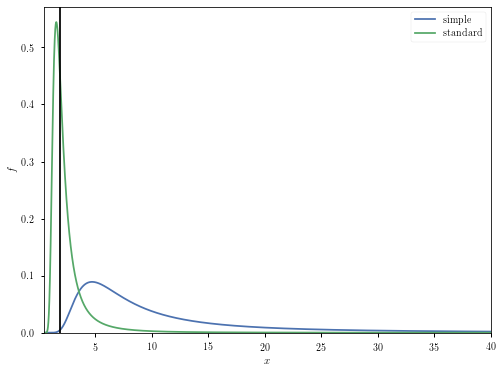

In [54]:
from scipy.integrate import quad

def fx_simple(x, *args):
    mu = simple(x)
    return skewnorm.pdf(mu, *args)*(1-mu)**2

def fx_standard(x, *args):
    mu = standard(x)
    return skewnorm.pdf(mu, *args)*(1-mu**2)**(3/2)

# plot
x = np.linspace(0, 40, 10000)
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, fx_simple(x, *mu0_fit), label='simple')
ax.plot(x, fx_standard(x, *mu0_fit), label='standard')
ax.axvline(1.87, c='k')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$f$')
ax.legend()
# ax.set_xscale('log')
ax.set_ylim(0)
ax.set_xlim(0.5, x.max())
plt.show()

The value of $a=(2.24\pm0.02)\times 10^{-10} \text{ m s}^{-2}$. 

For $a=1.2\times 10^{-10} \text{ m s}^{-2}$, therefore $x\approx1.87\times 10^{-10} \text{ m s}^{-2}$

convert $x$ to $a_0$.
\begin{align*}
    f_{a_0}(a_0)\text{d}a_0 &= \int_{x=G(a,a_0)} f_x(x)\text{d}x f_a(a)\text{d}a
\end{align*}

Where
\begin{align*}
    x = G(a,a_0) \\
    \text{d}x = |\partial_{a_0} G(a,a_0)|\text{d}a_0
\end{align*}

Therefore,
\begin{align*}
    f_{a_0}(a_0) &= \int_{\forall a} f_x\circ G (a,a_0)|\partial_{a_0}G(a,a_0)| f_a(a)\text{d}a
\end{align*}

In this case,
\begin{align*}
    x =G(a,a_0) &= \frac{a}{a_0} \\
    \text{d}x = |\partial_{a_0}G(a,a_0)|\text{d}a_0 &=  \frac{a}{a_0^2}\text{d}a_0
\end{align*}

Convert $x$ to $b=1/a_0$. To include the pdf of $a$, we need to make some adjustment.

\begin{align*}
    f_{b}(b)\text{d}b = \int_{b=F(a,x)} f_a(a) \text{d}a f_x(x) \text{d}x
\end{align*}

Therefore
\begin{align*}
    f_{a_0}(a_0) &= \int_{\forall a} f_x\left(\frac{a}{a_0}\right)\left(\frac{a}{a_0^2}\right) f_a(a)\text{d}a
\end{align*}

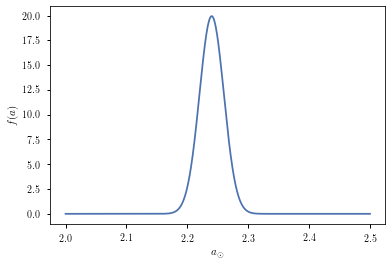

In [57]:
def f_a(a, loc, scale):
    return norm.pdf(a, loc, scale)

a_sun = np.linspace(2, 2.5, 1000)
f_a_sample = f_a(a_sun, 2.24, 0.02)

plt.plot(a_sun, f_a_sample)
plt.xlabel(r'$a_{\odot}$')
plt.ylabel(r'$f(a)$')
plt.show()

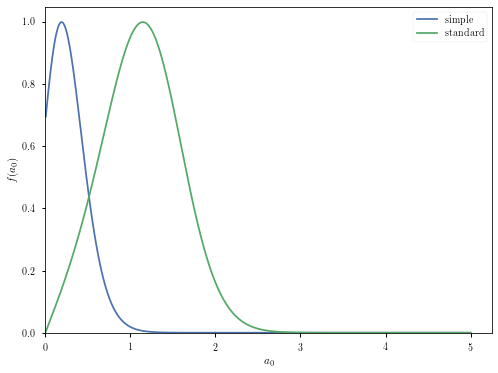

In [58]:
from scipy.integrate import simps

def G(a,a0):
    with np.errstate(divide='ignore'):
        return np.select([a0>0], [a/a0], default=np.nan)

def deriv_G(a,a0):
    with np.errstate(divide='ignore'):
        return np.select([a0>0], [a/a0**2], default=np.nan)

def f_a0_simple(a0, loc, scale, res, *args):
    a = np.linspace(2.1, 2.4, res)
    A, A0 = np.meshgrid(a, a0)
    X = G(A,A0)
    integrand = fx_simple(X, *args)*deriv_G(A, A0)*f_a(A, loc, scale)
    integral = simps(integrand, a, axis=1)
    # normalize to area of 1
    # area = simps(integral, a0)
    # integral /= area
    return np.select([a0>0], [integral], default=0)

def f_a0_standard(a0, loc, scale, res, *args):
    a = np.linspace(2.1, 2.4, res)
    A, A0 = np.meshgrid(a, a0)
    X = G(A,A0)
    integrand = fx_standard(X, *args)*deriv_G(A, A0)*f_a(A, loc, scale)
    integral = simps(integrand, a, axis=1)
    # normalize to area of 1
    # area = simps(integral, a0)
    # integral /= area
    return np.select([a0>0], [integral], default=0)

a0 = np.linspace(0, 5, 1000)
# remove the first element of a0
a0 = a0[1:]
loc = 2.24
scale = 0.02

f_a0_simple_sample = f_a0_simple(a0, loc, scale, 1000, *mu0_fit)
# normalize to max value
f_a0_simple_sample /= f_a0_simple_sample.max()
f_a0_standard_sample = f_a0_standard(a0, loc, scale, 1000,*mu0_fit)
# normalize to max value
f_a0_standard_sample /= f_a0_standard_sample.max()

# plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(a0, f_a0_simple_sample, label='simple')
ax.plot(a0, f_a0_standard_sample, label='standard')
ax.set_xlabel(r'$a_0$')
ax.set_ylabel(r'$f(a_0)$')
ax.legend()
ax.set_xlim(0)
ax.set_ylim(0)
plt.show()

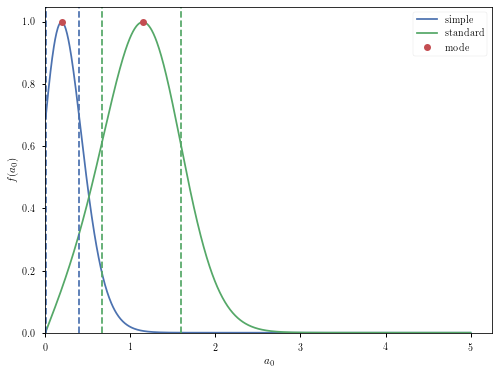

simple 0.01 0.39
standard 0.67 1.59


In [61]:
sigma = [68, 90, 95]
alpha = 1-np.array(sigma)/100
hpd, modes = hdi(lambda a0: f_a0_simple(a0, loc, scale, 500, *mu0_fit), -0.5, 5, alpha=alpha[0])
a0_simple_mode = modes[0]
a0_simple_low, a0_simple_high = hpd[0]
hpd, modes = hdi(lambda a0: f_a0_standard(a0, loc, scale, 500, *mu0_fit), 0, 5, alpha=alpha[0])
a0_standard_mode = modes[0]
a0_standard_low, a0_standard_high = hpd[0]

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(a0, f_a0_simple_sample, label='simple')
ax.plot(a0, f_a0_standard_sample, label='standard')
ax.plot([a0_simple_mode, a0_standard_mode], [1, 1], 'o', label='mode')
ax.axvline(a0_simple_low, color='C0', ls='--')
ax.axvline(a0_simple_high, color='C0', ls='--')
ax.axvline(a0_standard_low, color='C1', ls='--')
ax.axvline(a0_standard_high, color='C1', ls='--')
ax.set_xlabel(r'$a_0$')
ax.set_ylabel(r'$f(a_0)$')
ax.legend()
ax.set_xlim(0)
ax.set_ylim(0)
plt.show()

print("simple", a0_simple_low, a0_simple_high)
print("standard", a0_standard_low, a0_standard_high)

### automation

In [69]:
files

['/home2/s20321005/Thesis-Project/Data/MCMC-no/no/data/chain-(-0.00)_(0.11).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/no/data/chain-(0.11)_(0.16).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/no/data/chain-(0.16)_(0.19).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/no/data/chain-(0.19)_(0.22).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/no/data/chain-(0.22)_(0.24).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/no/data/chain-(0.24)_(0.27).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/no/data/chain-(0.27)_(0.29).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/no/data/chain-(0.29)_(0.31).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/no/data/chain-(0.31)_(0.32).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/no/data/chain-(0.32)_(0.34).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/no/data/chain-(0.34)_(0.36).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/no/data/chain-(0.36)_(0.37).npy']

0it [00:00, ?it/s]

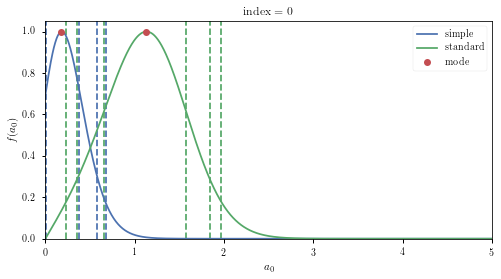

1it [00:07,  7.58s/it]

index = 0
mu0_fit (0.9523556275106584, 0.8560944870301248, 0.10445067232188948)
simple
	mode = 0.18
	err
		alpha = 0.32, low = 0.01, high = 0.38
		alpha = 0.10, low = 0.00, high = 0.58
		alpha = 0.05, low = 0.00, high = 0.68
standard
	mode = 1.13
	err
		alpha = 0.32, low = 0.66, high = 1.57
		alpha = 0.10, low = 0.35, high = 1.84
		alpha = 0.05, low = 0.23, high = 1.97


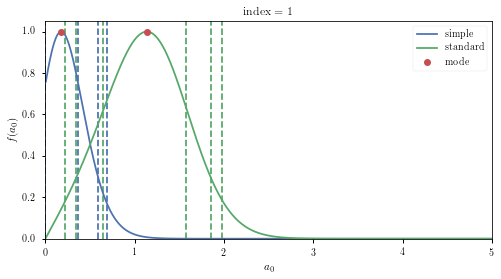

2it [00:15,  7.66s/it]

index = 1
mu0_fit (1.2346296886042005, 0.8456000850693404, 0.11863206349380799)
simple
	mode = 0.18
	err
		alpha = 0.32, low = 0.00, high = 0.37
		alpha = 0.10, low = 0.00, high = 0.59
		alpha = 0.05, low = 0.00, high = 0.69
standard
	mode = 1.14
	err
		alpha = 0.32, low = 0.65, high = 1.58
		alpha = 0.10, low = 0.34, high = 1.85
		alpha = 0.05, low = 0.22, high = 1.98


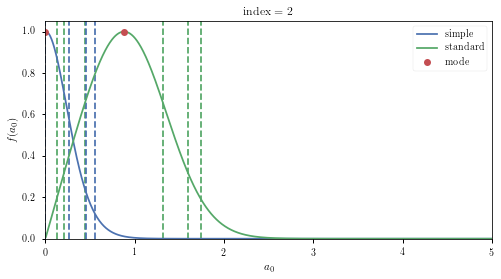

3it [00:23,  7.77s/it]

index = 2
mu0_fit (1.3006563744735797, 0.9043872728892713, 0.1349605190069886)
simple
	mode = 0.00
	err
		alpha = 0.32, low = 0.00, high = 0.27
		alpha = 0.10, low = 0.00, high = 0.46
		alpha = 0.05, low = 0.00, high = 0.56
standard
	mode = 0.88
	err
		alpha = 0.32, low = 0.44, high = 1.32
		alpha = 0.10, low = 0.21, high = 1.60
		alpha = 0.05, low = 0.13, high = 1.74


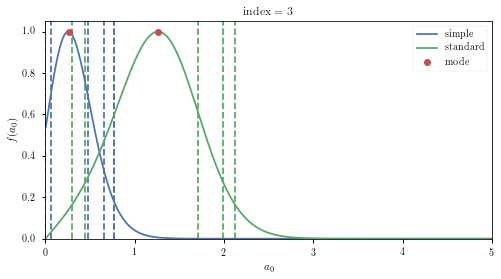

4it [00:30,  7.66s/it]

index = 3
mu0_fit (1.1049793843011364, 0.8241666681051045, 0.10877937899052009)
simple
	mode = 0.26
	err
		alpha = 0.32, low = 0.06, high = 0.48
		alpha = 0.10, low = 0.00, high = 0.66
		alpha = 0.05, low = 0.00, high = 0.77
standard
	mode = 1.26
	err
		alpha = 0.32, low = 0.77, high = 1.71
		alpha = 0.10, low = 0.44, high = 1.99
		alpha = 0.05, low = 0.30, high = 2.12


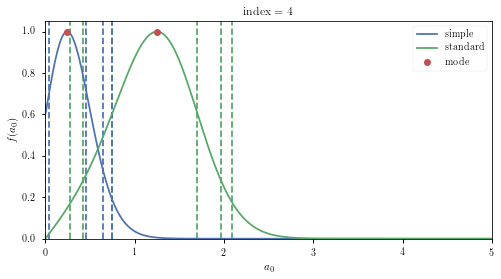

5it [00:38,  7.60s/it]

index = 4
mu0_fit (1.4145354302210909, 0.818345689331951, 0.12121955792395972)
simple
	mode = 0.24
	err
		alpha = 0.32, low = 0.04, high = 0.46
		alpha = 0.10, low = 0.00, high = 0.64
		alpha = 0.05, low = 0.00, high = 0.75
standard
	mode = 1.25
	err
		alpha = 0.32, low = 0.75, high = 1.70
		alpha = 0.10, low = 0.42, high = 1.97
		alpha = 0.05, low = 0.28, high = 2.09


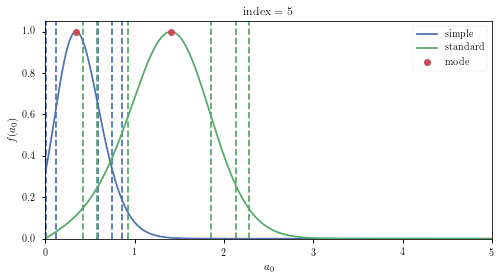

6it [00:46,  7.71s/it]

index = 5
mu0_fit (1.1244396552349119, 0.7967201648566764, 0.10433754846435589)
simple
	mode = 0.34
	err
		alpha = 0.32, low = 0.12, high = 0.59
		alpha = 0.10, low = 0.01, high = 0.75
		alpha = 0.05, low = 0.00, high = 0.86
standard
	mode = 1.41
	err
		alpha = 0.32, low = 0.93, high = 1.86
		alpha = 0.10, low = 0.58, high = 2.14
		alpha = 0.05, low = 0.42, high = 2.28


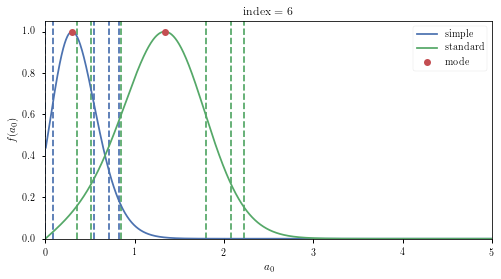

7it [00:53,  7.68s/it]

index = 6
mu0_fit (1.0924437317491302, 0.8095092093296021, 0.10762239899286233)
simple
	mode = 0.30
	err
		alpha = 0.32, low = 0.09, high = 0.54
		alpha = 0.10, low = 0.00, high = 0.71
		alpha = 0.05, low = 0.00, high = 0.82
standard
	mode = 1.34
	err
		alpha = 0.32, low = 0.85, high = 1.80
		alpha = 0.10, low = 0.51, high = 2.08
		alpha = 0.05, low = 0.35, high = 2.22


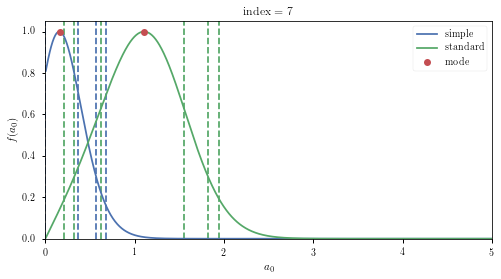

8it [01:01,  7.64s/it]

index = 7
mu0_fit (1.2894701020347734, 0.8504912842303628, 0.12259732168134563)
simple
	mode = 0.16
	err
		alpha = 0.32, low = 0.00, high = 0.36
		alpha = 0.10, low = 0.00, high = 0.57
		alpha = 0.05, low = 0.00, high = 0.68
standard
	mode = 1.11
	err
		alpha = 0.32, low = 0.62, high = 1.55
		alpha = 0.10, low = 0.32, high = 1.82
		alpha = 0.05, low = 0.21, high = 1.95


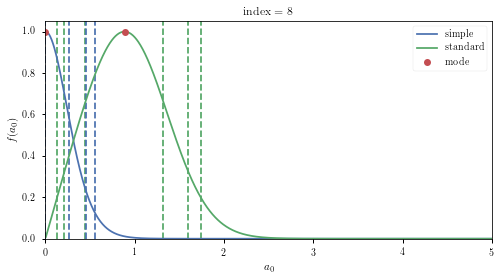

9it [01:08,  7.61s/it]

index = 8
mu0_fit (1.443442451911934, 0.8993889349515186, 0.14336029271394174)
simple
	mode = 0.00
	err
		alpha = 0.32, low = 0.00, high = 0.27
		alpha = 0.10, low = 0.00, high = 0.46
		alpha = 0.05, low = 0.00, high = 0.56
standard
	mode = 0.89
	err
		alpha = 0.32, low = 0.44, high = 1.32
		alpha = 0.10, low = 0.21, high = 1.60
		alpha = 0.05, low = 0.13, high = 1.74


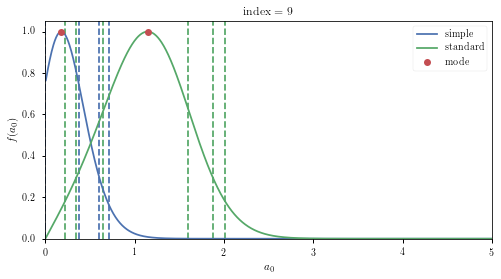

10it [01:16,  7.60s/it]

index = 9
mu0_fit (1.256374374141938, 0.8422592455823147, 0.1219811773916692)
simple
	mode = 0.18
	err
		alpha = 0.32, low = 0.00, high = 0.38
		alpha = 0.10, low = 0.00, high = 0.60
		alpha = 0.05, low = 0.00, high = 0.71
standard
	mode = 1.15
	err
		alpha = 0.32, low = 0.65, high = 1.60
		alpha = 0.10, low = 0.34, high = 1.88
		alpha = 0.05, low = 0.22, high = 2.01


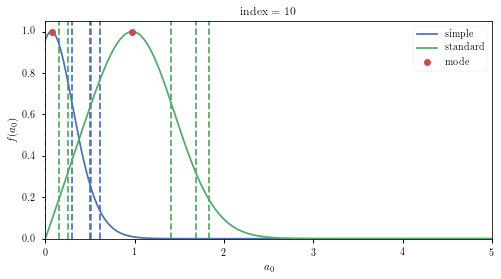

11it [01:23,  7.58s/it]

index = 10
mu0_fit (1.3659188631379249, 0.8785305409093467, 0.1333888270133039)
simple
	mode = 0.07
	err
		alpha = 0.32, low = 0.00, high = 0.30
		alpha = 0.10, low = 0.00, high = 0.50
		alpha = 0.05, low = 0.00, high = 0.61
standard
	mode = 0.97
	err
		alpha = 0.32, low = 0.51, high = 1.41
		alpha = 0.10, low = 0.25, high = 1.69
		alpha = 0.05, low = 0.15, high = 1.83


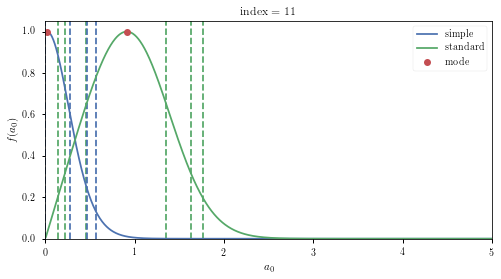

12it [01:31,  7.63s/it]

index = 11
mu0_fit (1.4968218480063764, 0.8911710464472311, 0.1438566519865532)
simple
	mode = 0.02
	err
		alpha = 0.32, low = 0.00, high = 0.28
		alpha = 0.10, low = 0.00, high = 0.47
		alpha = 0.05, low = 0.00, high = 0.57
standard
	mode = 0.91
	err
		alpha = 0.32, low = 0.46, high = 1.35
		alpha = 0.10, low = 0.22, high = 1.63
		alpha = 0.05, low = 0.14, high = 1.76


In [81]:
mu0_fits = []
a0_simple_modes = []
a0_standard_modes = []
a0_simple_errs = []
a0_standard_errs = []

from scipy.stats import skewnorm

def skewpdf(x, *args):
    A, other = args[0], args[1:]
    return A*skewnorm.pdf(x, *other)

sigma = [68, 90, 95]
alpha = 1-np.array(sigma)/100

for index, file in enumerate(tqdm(files)):
    # if index != 2:
    #     continue
    # fit mu0
    df = np.load(file)
    rhob = df[:, :, 12:24]
    rhob = rhob.reshape(-1, 12)
    rhob = rhob.sum(axis=1)/1E-2
    length = rhob.shape[0]
    rhob0 = np.empty((length, 12))
    for i in range(12):
        rhob0[:,i] = norm.rvs(loc=rhos[i], scale=e_rhos[i], size=length)
    rhob0 = rhob0.sum(axis=1)/1E-2
    rhoD = rhob - rhob0

    one_over_mu0 = 1 + rhoD/rhob0
    mu0 = 1/one_over_mu0
    # plot mu0 histogram
    mu0s_edge = np.linspace(0.5, 1.5, 100)
    mu0s = 0.5*(mu0s_edge[1:] + mu0s_edge[:-1])
    mu0_num, _ = np.histogram(mu0, bins=mu0s_edge)
    area = mu0_num.sum()*np.diff(mu0s_edge)[0]
    mu0_num = mu0_num/area

    # fit with skew normal
    mu0_sample = np.random.choice(mu0, size=10000, replace=False)
    mu0_fit = skewnorm.fit(mu0_sample)
    mu0_fits.append(mu0_fit)
    # plot fa0
    a0 = np.linspace(0, 5, 1000)
    # remove the first element of a0
    a0 = a0[1:]
    loc = 2.24
    scale = 0.02

    f_a0_simple_sample = f_a0_simple(a0, loc, scale, 1000, *mu0_fit)
    # normalize to max value
    f_a0_simple_sample /= f_a0_simple_sample.max()
    f_a0_standard_sample = f_a0_standard(a0, loc, scale, 1000,*mu0_fit)
    # normalize to max value
    f_a0_standard_sample /= f_a0_standard_sample.max()

    hpd, modes = hdi(lambda a0: f_a0_simple(a0, loc, scale, 500, *mu0_fit), -0.5, 5, alpha=alpha[0])
    a0_simple_mode = modes[0]
    a0_simple_low, a0_simple_high = hpd[0]
    hpd, modes = hdi(lambda a0: f_a0_standard(a0, loc, scale, 500, *mu0_fit), 0, 5, alpha=alpha[0])
    a0_standard_mode = modes[0]
    a0_standard_low, a0_standard_high = hpd[0]

    a0_simple_err = []
    a0_standard_err = []
    a0_simple_mode = 0
    a0_standard_mode = 0
    fig, ax = plt.subplots(figsize=(8, 4))
    for alp in alpha:
        hpd, modes = hdi(lambda a0: f_a0_simple(a0, loc, scale, 500, *mu0_fit), -0.5, a0.max(), alpha=alp, res=10_000)
        a0_simple_mode = modes[0]
        low, high = hpd[0]
        a0_simple_err.append({'alpha': alp, 'low': low, 'high': high})
        ax.axvline(low, color='C0', ls='--')
        ax.axvline(high, color='C0', ls='--')
        hpd, modes = hdi(lambda a0: f_a0_standard(a0, loc, scale, 500, *mu0_fit), -0.5, a0.max(), alpha=alp, res=10_000)
        a0_standard_mode = modes[0]
        low, high = hpd[0]
        a0_standard_err.append({'alpha': alp, 'low': low, 'high': high})
        ax.axvline(low, color='C1', ls='--')
        ax.axvline(high, color='C1', ls='--')
        # break
    a0_simple_errs.append(a0_simple_err)
    a0_standard_errs.append(a0_standard_err)
    a0_simple_modes.append(a0_simple_mode)
    a0_standard_modes.append(a0_standard_mode)
    ax.plot(a0, f_a0_simple_sample, label='simple')
    ax.plot(a0, f_a0_standard_sample, label='standard')
    ax.plot([a0_simple_mode, a0_standard_mode], [1, 1], 'o', label='mode')
    
    ax.set_xlabel(r'$a_0$')
    ax.set_ylabel(r'$f(a_0)$')
    ax.legend()
    ax.set_xlim(0,a0.max())
    ax.set_ylim(0)
    ax.set_title(f"index = {index}")
    plt.show()
    print(f"index = {index}")
    print("mu0_fit", mu0_fit)
    print("simple")
    print("\tmode = {:.02f}".format(a0_simple_mode))
    print("\terr")
    for err in a0_simple_err:
        print("\t\talpha = {:.02f}, low = {:.02f}, high = {:.02f}".format(err['alpha'], err['low'], err['high']))
    print("standard")
    print("\tmode = {:.02f}".format(a0_standard_mode))
    print("\terr")
    for err in a0_standard_err:
        print("\t\talpha = {:.02f}, low = {:.02f}, high = {:.02f}".format(err['alpha'], err['low'], err['high']))
    # break

(0.0, 5.0)

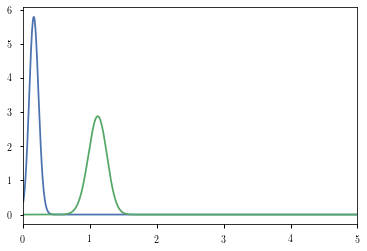

In [82]:
# multiplying the rhoDM, but it became addition in log
a0s = np.linspace(0.01, 5, 1000)
a0_simple_com = None
a0_standard_com = None
for mu0_fit in mu0_fits:
    if a0_simple_com is None:
        a0_simple_com = f_a0_simple(a0s, loc, scale, 500, *mu0_fit)
    else:
        a0_simple_com *= f_a0_simple(a0s, loc, scale, 500, *mu0_fit)
    if a0_standard_com is None:
        a0_standard_com = f_a0_standard(a0s, loc, scale, 500, *mu0_fit)
    else:
        a0_standard_com *= f_a0_standard(a0s, loc, scale, 500, *mu0_fit)
# find area
area = np.trapz(a0_simple_com, a0s)
a0_simple_com /= area
area = np.trapz(a0_standard_com, a0s)
a0_standard_com /= area
# plot
fig, ax = plt.subplots()
ax.plot(a0s, a0_simple_com, label='simple')
ax.plot(a0s, a0_standard_com, label='standard')
ax.set_xlim(0,5)

In [83]:
from scipy.optimize import curve_fit

a0_simple_com_fit, _ = curve_fit(skewnorm.pdf, a0s, a0_simple_com, p0=[1, 1.0, 2.0])
a0_standard_com_fit, _ = curve_fit(skewnorm.pdf, a0s, a0_standard_com, p0=[1, 1.0, 2.0])
a0_simple_com_fit, a0_standard_com_fit

(array([0.85071592, 0.12752366, 0.08101849]),
 array([-0.7646614 ,  1.19296965,  0.15873036]))

(0.0, 5.0)

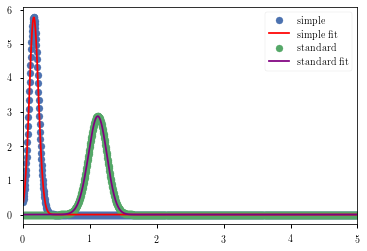

In [84]:
plt.scatter(a0s, a0_simple_com, label='simple')
plt.plot(a0s, skewnorm.pdf(a0s, *a0_simple_com_fit), c='r', label='simple fit')
plt.scatter(a0s, a0_standard_com, label='standard')
plt.plot(a0s, skewnorm.pdf(a0s, *a0_standard_com_fit), c='purple', label='standard fit')
plt.legend()
plt.xlim(0,5)

In [85]:
a0_simple_com_errs = []
a0_standard_com_errs = []
a0_simple_com_mode = 0
a0_standard_com_mode = 0
for i, alp in enumerate(alpha):
    hpd, modes = hdi(lambda x: skewnorm.pdf(x, *a0_simple_com_fit), -0.5, 5., alpha=alp, res=10_000)
    low, high = hpd[0]
    a0_simple_com_mode = modes[0]
    a0_simple_com_errs.append({'alpha': alpha, 'low': low, 'high': high})
    hpd, modes = hdi(lambda x: skewnorm.pdf(x, *a0_standard_com_fit), -0.5, 5., alpha=alp, res=10_000)
    low, high = hpd[0]
    a0_standard_com_mode = modes[0]
    a0_standard_com_errs.append({'alpha': alpha, 'low': low, 'high': high})

In [86]:
a0_simple_com_mode, a0_simple_com_errs

(0.17,
 [{'alpha': array([0.32, 0.1 , 0.05]), 'low': 0.1, 'high': 0.24},
  {'alpha': array([0.32, 0.1 , 0.05]), 'low': 0.06, 'high': 0.28},
  {'alpha': array([0.32, 0.1 , 0.05]), 'low': 0.03, 'high': 0.31}])

In [87]:
a0_standard_com_mode, a0_standard_com_errs

(1.12,
 [{'alpha': array([0.32, 0.1 , 0.05]), 'low': 0.98, 'high': 1.26},
  {'alpha': array([0.32, 0.1 , 0.05]), 'low': 0.89, 'high': 1.34},
  {'alpha': array([0.32, 0.1 , 0.05]), 'low': 0.84, 'high': 1.39}])

In [88]:
A9 = sp[sp['SpT'] == 'A9V']['J-K'].values[0]
F0 = sp[sp['SpT'] == 'F0V']['J-K'].values[0]
b1 = (A9+F0)/2

F9 = sp[sp['SpT'] == 'F9V']['J-K'].values[0]
G0 = sp[sp['SpT'] == 'G0V']['J-K'].values[0]
b2 = (F9+G0)/2
b1, b2

(0.1355, 0.314)

In [89]:
a0_simple_modes

[0.18, 0.18, 0.0, 0.26, 0.24, 0.34, 0.3, 0.16, 0.0, 0.18, 0.07, 0.02]

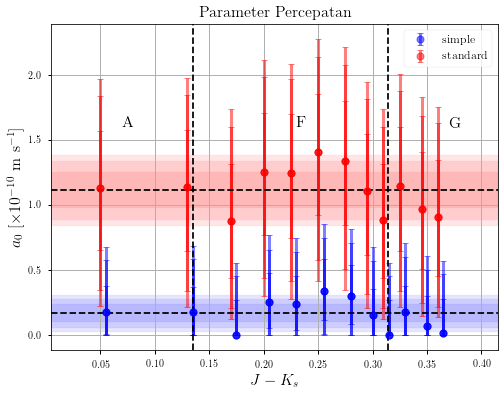

In [94]:
cs = np.linspace(c.min()-0.05, c.max()+0.05, 100)
dc = c2-c1

fig, ax = plt.subplots(figsize=(8, 6))
for i in range(3):
    low = np.array([arr[i]['low'] for arr in a0_simple_errs])
    high = np.array([arr[i]['high'] for arr in a0_simple_errs])  
    simple_ax = ax.errorbar(c, a0_simple_modes, yerr=[a0_simple_modes-low, high-a0_simple_modes], fmt='o', 
                        color='blue', capsize=3, alpha=0.5, elinewidth=3, markeredgewidth=1)
    low = np.array([arr[i]['low'] for arr in a0_standard_errs])
    high = np.array([arr[i]['high'] for arr in a0_standard_errs])  
    standard_ax = ax.errorbar(c-0.005, a0_standard_modes, yerr=[a0_standard_modes-low, high-a0_standard_modes], fmt='o', 
                        color='red', capsize=3, alpha=0.5, elinewidth=3, markeredgewidth=1)
    
    ax.fill_between(cs, a0_simple_com_errs[i]['low'], a0_simple_com_errs[i]['high'], color='blue', alpha=0.1)
    ax.fill_between(cs, a0_standard_com_errs[i]['low'], a0_standard_com_errs[i]['high'], color='red', alpha=0.1)
    if i == 2:
        ax.legend([simple_ax, standard_ax], 
                  ['simple', 'standard'],
                  loc='best', fontsize=12)
# real value
ax.axhline(y=a0_simple_com_mode, color='black', linestyle='--')
ax.axhline(y=a0_standard_com_mode, color='black', linestyle='--')
ax.axvline(x=b1, color='black', linestyle='--')
ax.axvline(x=b2, color='black', linestyle='--')
ax.set_xlabel(r'$J-K_s$', fontsize=16)
ax.set_ylabel(r'$a_0$ [$\times 10^{-10}$ m s$^{-1}$]', fontsize=16)
ax.set_xlim(cs.min(), cs.max())
ax.set_title("Parameter Percepatan", fontsize=16)
ax.text(0.07, 1.6, r'$\textup{A}$', fontsize=16)
ax.text(0.23, 1.6, r'$\textup{F}$', fontsize=16)
ax.text(0.37, 1.6, r'$\textup{G}$', fontsize=16)
ax.grid()
fig.savefig(join('img', 'a0.pdf'), dpi=300)
plt.show()